In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
labels = ["AL-AZ", "CIR","KPD", "MKN",  "ZGS"]
categories = [r"$\beta$", r"$K_0$", r"$\alpha$", r"$C$", r"$P$", r"$D \times 10^{-2}$", r"$\gamma$", r"$q$"]
data = {}

# Load the new Excel file to inspect its contents
file_path = '/content/Results.xlsx'
excel_data = pd.ExcelFile(file_path)

for category in categories:
  parameter = {}
  v_datasheet = []
  e_datasheet = []
  for sheet_name in excel_data.sheet_names:
      # Load the data from the sheet
      sheet_data = pd.read_excel(file_path, sheet_name=sheet_name)

      v_array = []
      e_array = []
      for i in range(len(sheet_data)):
        try:
          value, _ = str(sheet_data.iloc[i][category]).split('±')
          error = 0
        except:
          if sheet_data.iloc[i][category] == 'nan':
            value = 'nan'
          else:
            value = float(sheet_data.iloc[i][category])
          error = 0
        v_array.append(float(value))
        e_array.append(float(error))
      v_datasheet.append(np.array(v_array))
      e_datasheet.append(np.array(e_array))
  parameter["y"] = v_datasheet
  parameter["errors"] = e_datasheet
  data[category] = parameter

        # print(sheet_data.iloc[i][category])
  #     datasheet.append(np.array(sheet_data[category]))
  # data
  #     data = {
  #       category: {
  #           "y": [np.array],
  #           "errors": [np.random.rand(len(labels)) * 0.1 for _ in range(data_points)],
  #       }
  #       for category in categories
  #   }

data

{'$\\beta$': {'y': [array([2.89, 2.62, 2.76, 2.84, 3.17]),
   array([2.43, 2.56, 2.57, 2.2 , 2.64]),
   array([2.38, 2.34, 2.28, 2.8 , 2.57]),
   array([2.38, 2.41, 2.22, 2.01, 3.19])],
  'errors': [array([0., 0., 0., 0., 0.]),
   array([0., 0., 0., 0., 0.]),
   array([0., 0., 0., 0., 0.]),
   array([0., 0., 0., 0., 0.])]},
 '$K_0$': {'y': [array([0.12, 0.15, 0.19, 0.1 , 0.23]),
   array([0.25, 0.68, 0.17, 0.18, 0.25]),
   array([0.15, 0.21, 0.28, 0.1 , 0.2 ]),
   array([0.18, 0.15, 0.28, 0.21, 0.23])],
  'errors': [array([0., 0., 0., 0., 0.]),
   array([0., 0., 0., 0., 0.]),
   array([0., 0., 0., 0., 0.]),
   array([0., 0., 0., 0., 0.])]},
 '$\\alpha$': {'y': [array([2.15, 1.68, 2.19, 2.4 , 2.05]),
   array([1.71, 1.51, 2.11, 1.75, 2.01]),
   array([1.92, 1.57, 1.74, 2.44, 2.05]),
   array([1.85, 1.66, 1.76, 1.32, 2.03])],
  'errors': [array([0., 0., 0., 0., 0.]),
   array([0., 0., 0., 0., 0.]),
   array([0., 0., 0., 0., 0.]),
   array([0., 0., 0., 0., 0.])]},
 '$C$': {'y': [array([0.

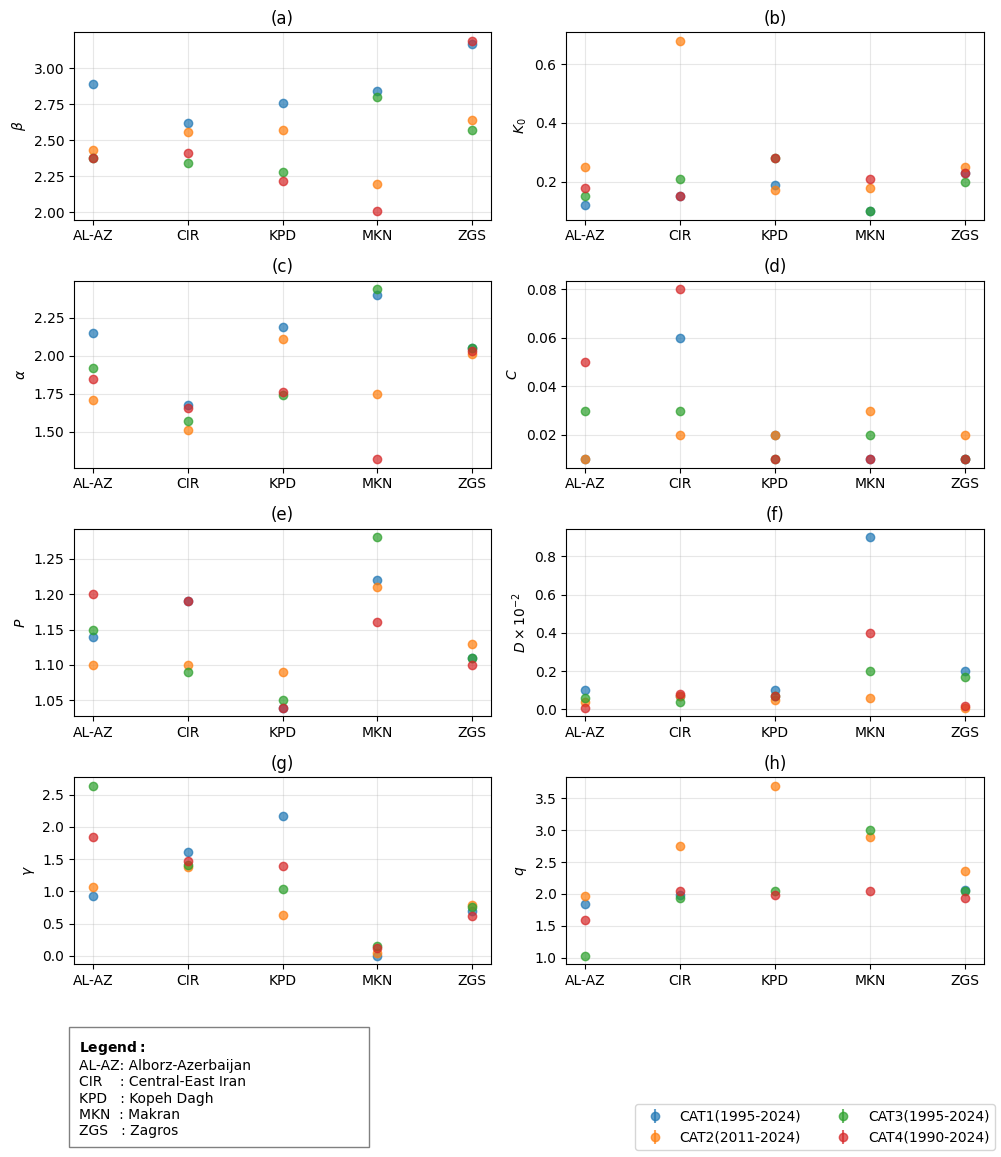

In [3]:
import matplotlib.pyplot as plt
import numpy as np

mdata = ["CAT1(1995-2024)", "CAT2(2011-2024)", "CAT3(1995-2024)", "CAT4(1990-2024)"]

x = np.arange(len(labels)) + 1


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axes = axes.flatten()

for idx, (category, ax) in enumerate(zip(categories, axes)):
    for i, (y_vals, y_errs) in enumerate(zip(data[category]["y"], data[category]["errors"])):
        ax.errorbar(
            x,
            y_vals,
            yerr=y_errs,
            fmt="o",
            label=mdata[i],
            alpha=0.7
        )

    ax.set_title(f"({chr(97 + idx)})")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel(category)
    ax.grid(alpha=0.3)

# # Shared X-axis Label
# fig.text(0.5, 0.06, "Magnitude Range", ha="center", fontsize=12)
# fig.text(0.04, 0.5, "Values", va="center", rotation="vertical", fontsize=12)

# Add legend to the last subplot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right", ncol=2, fontsize=10)

# Explanation of labels
fig.add_artist(plt.Rectangle((0.07, 0.00), 0.3, 0.1, color="white", ec="gray", transform=fig.transFigure, lw=1))
# fig.text(0.2, 0.06, "KPD : Kopeh Dagh\nMKN : Makran\nAL-AZ: Alborz-Azerbaijan \nZGS : Zagros\nCIR : Central-East Iran", ha="left", fontsize=10, va="top")

# Add explanatory text inside the rectangle
fig.text(
    0.07 + 0.01, 0.01 + 0.08,  # Adjust position to be inside the rectangle
    r"$\mathbf{Legend:}$"+"\nAL-AZ: Alborz-Azerbaijan\nCIR    : Central-East Iran\nKPD   : Kopeh Dagh\nMKN  : Makran\nZGS   : Zagros",
    ha="left",
    fontsize=10,
    va="top"
)

plt.tight_layout(rect=[0, 0.12, 1, 0.96])

# Save the plot to a file
plt.savefig("parameters.png", dpi=300, bbox_inches="tight")


plt.show()
# labels = ["KPD", "MKN", "AL-AZ", "ZGS", "CIR"]
